In [1]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Admission_Predict.csv')

df.head()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df = df.rename({
    'Serial No.': 'Id',
    'GRE Score': 'GRE', 
    'TOEFL Score': 'TOEFL', 
    'University Rating': 'UniversityRating', 
    'SOP': 'StatementOfPurpose',
    'LOR ': 'LetterOfRec', 
    'CGPA': 'CGPA', 
    'Research': 'Research', 
    'Chance of Admit ': 'ChanceOfAdmit'
}, axis=1)

df.drop('TOEFL', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

df.head()


,GRE,UniversityRating,StatementOfPurpose,LetterOfRec,CGPA,Research,ChanceOfAdmit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [4]:
def predict(x, w, b):
    """
    @param x (ndarray): Shape (n,) example with multiple features
    @param w (ndarray): Shape (n,) model parameters   
    @param b (scalar) : Model parameter 

    @return p (scalar):  Prediction
    """

    return np.dot(x, w) + b

def compute_cost(X, y, w, b):
    """
    @param X (ndarray): Shape (m,n) training data m examples with n features
    @param y (ndarray): Shape (m,) target values
    @param x (ndarray): Shape (n,) weight for each feature
    @param b (scalar) : Model parameter

    @return cost (scalar): One-half MSE loss
    """

    m = X.shape[0]
    cost = 0

    for i in range(m):
        prediction = predict(X[i], w, b)
        cost += (prediction - y[i]) ** 2

    cost /= (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    """
    @param X (ndarray): Shape (m,n) Data, m examples with n features
    @param y (ndarray): Shape (m,) target values
    @param w (ndarray): Shape (n,) model parameters  
    @param b (scalar) : Model parameter
      
    @return dj_dw (ndarray): Shape (n,) The gradient of the cost with respect to vector w
    @return dj_db (scalar) : The gradient of the cost with respect to b
    """

    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        error = predict(X[i], w, b) - y[i]

        for ii in range(n):
            dj_dw[ii] += error * X[i,ii]

        dj_db += error

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    @param X (ndarray)         : Shape (m,n) Data, m examples with n features
    @param y (ndarray)         : Shape (m,) target values
    @param w_in (ndarray)      : Shape (n,) Vector w
    @param b_in (scalar)       : Model parameter b
    @param cost_function       : Compute cost function
    @param gradient_function   : Compute gradient function (default: batch gradient descent)
    @param alpha (float)       : Learning rate
    @param num_iters (int)     : Number of iterations
      
    @return w (ndarray): Shape (n,) Updated values of parameters 
    @return b (scalar): Updated value of parameter 
    """
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        print(f"Iteration No. {i}")

        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<1000:
            cost = compute_cost(X, y, w, b)
            print(f"Cost: {cost}")
            J_history.append(cost)
        
    return w, b, J_history

In [5]:
y_train = df["ChanceOfAdmit"].values
X_train = df.drop('ChanceOfAdmit', axis=1).values

w_init = np.zeros((6,))
b_init = 0

In [6]:
alpha_init = 1e-3
num_iterations = 1000

w, b, J_history = gradient_descent(
    X_train, 
    y_train, 
    w_init, 
    b_init, 
    compute_cost, 
    compute_gradient, 
    alpha_init, 
    num_iterations
)

print(f"Model paramters found using batch gradient descent. {b} {w}")
print(f"Randomly Selected Prediction: {predict(X_train[15], w, b)}")
print(f"Randomly Selected Target: {y_train[15]}")

Iteration No. 0
Cost: 2629.2874394067644
Iteration No. 1
Cost: 26086643.58880792
Iteration No. 2
Cost: 258821038044.71628
Iteration No. 3
Cost: 2567916778009491.0
Iteration No. 4
Cost: 2.54778229335575e+19
Iteration No. 5
Cost: 2.527805678877451e+23
Iteration No. 6
Cost: 2.507985696748414e+27
Iteration No. 7
Cost: 2.48832111884799e+31
Iteration No. 8
Cost: 2.468810726684947e+35
Iteration No. 9
Cost: 2.449453311321994e+39
Iteration No. 10
Cost: 2.430247673300856e+43
Iteration No. 11
Cost: 2.4111926225679424e+47
Iteration No. 12
Cost: 2.3922869784006345e+51
Iteration No. 13
Cost: 2.3735295693340945e+55
Iteration No. 14
Cost: 2.3549192330886987e+59
Iteration No. 15
Cost: 2.336454816497995e+63
Iteration No. 16
Cost: 2.3181351754372733e+67
Iteration No. 17
Cost: 2.299959174752662e+71
Iteration No. 18
Cost: 2.2819256881907714e+75
Iteration No. 19
Cost: 2.2640335983289403e+79
Iteration No. 20
Cost: 2.24628179650597e+83
Iteration No. 21
Cost: 2.2286691827534407e+87
Iteration No. 22
Cost: 2.211

/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_42026/336296979.py:27: RuntimeWarning: overflow encountered in double_scalars
  cost += (prediction - y[i]) ** 2



Iteration No. 86
Cost: inf
Iteration No. 87
Cost: inf
Iteration No. 88
Cost: inf
Iteration No. 89
Cost: inf
Iteration No. 90
Cost: inf
Iteration No. 91
Cost: inf
Iteration No. 92
Cost: inf
Iteration No. 93
Cost: inf
Iteration No. 94
Cost: inf
Iteration No. 95
Cost: inf
Iteration No. 96
Cost: inf
Iteration No. 97
Cost: inf
Iteration No. 98
Cost: inf
Iteration No. 99
Cost: inf
Iteration No. 100
Cost: inf
Iteration No. 101
Cost: inf
Iteration No. 102
Cost: inf
Iteration No. 103
Cost: inf
Iteration No. 104
Cost: inf
Iteration No. 105
Cost: inf
Iteration No. 106
Cost: inf
Iteration No. 107
Cost: inf
Iteration No. 108
Cost: inf
Iteration No. 109
Cost: inf
Iteration No. 110
Cost: inf
Iteration No. 111
Cost: inf
Iteration No. 112
Cost: inf
Iteration No. 113
Cost: inf
Iteration No. 114
Cost: inf
Iteration No. 115
Cost: inf
Iteration No. 116
Cost: inf
Iteration No. 117
Cost: inf
Iteration No. 118
Cost: inf
Iteration No. 119
Cost: inf
Iteration No. 120
Cost: inf
Iteration No. 121
Cost: inf
Itera

/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_42026/336296979.py:51: RuntimeWarning: overflow encountered in double_scalars
  dj_dw[ii] += error * X[i,ii]
/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_42026/336296979.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dj_dw[ii] += error * X[i,ii]
/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_42026/336296979.py:85: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw



Iteration No. 167
Cost: nan
Iteration No. 168
Cost: nan
Iteration No. 169
Cost: nan
Iteration No. 170
Cost: nan
Iteration No. 171
Cost: nan
Iteration No. 172
Cost: nan
Iteration No. 173
Cost: nan
Iteration No. 174
Cost: nan
Iteration No. 175
Cost: nan
Iteration No. 176
Cost: nan
Iteration No. 177
Cost: nan
Iteration No. 178
Cost: nan
Iteration No. 179
Cost: nan
Iteration No. 180
Cost: nan
Iteration No. 181
Cost: nan
Iteration No. 182
Cost: nan
Iteration No. 183
Cost: nan
Iteration No. 184
Cost: nan
Iteration No. 185
Cost: nan
Iteration No. 186
Cost: nan
Iteration No. 187
Cost: nan
Iteration No. 188
Cost: nan
Iteration No. 189
Cost: nan
Iteration No. 190
Cost: nan
Iteration No. 191
Cost: nan
Iteration No. 192
Cost: nan
Iteration No. 193
Cost: nan
Iteration No. 194
Cost: nan
Iteration No. 195
Cost: nan
Iteration No. 196
Cost: nan
Iteration No. 197
Cost: nan
Iteration No. 198
Cost: nan
Iteration No. 199
Cost: nan
Iteration No. 200
Cost: nan
Iteration No. 201
Cost: nan
Iteration No. 202
C

In [7]:
def plot_cost(cost_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    ax1.plot(cost_history)
    ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
    
    ax1.set_title("Cost over time (head)")
    ax2.set_title("Cost over time (tail)")
    
    ax1.set_ylabel('Cost J(w,b)')
    ax2.set_ylabel('Cost J(w,b)') 
    
    ax1.set_xlabel('Iterations')
    ax2.set_xlabel('Iterations') 
    
    plt.show()

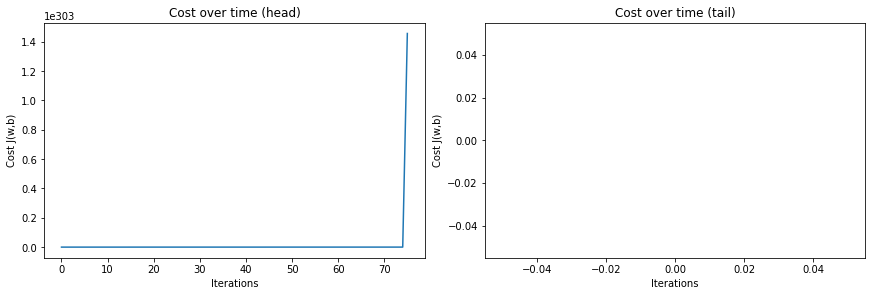

In [8]:
plot_cost(J_history)

# Gradient Descent is Diverging

This either means our learning rate is too large, or there was a coding error. Let's adjust the learning rate to make sure we try a small enough alpha value.

In [9]:
alpha_init = 3e-8
num_iterations = 1000

w, b, J_history = gradient_descent(
    X_train, 
    y_train, 
    w_init, 
    b_init, 
    compute_cost, 
    compute_gradient, 
    alpha_init, 
    num_iterations
)

print(f"Model paramters found using batch gradient descent. {b} {w}")
print(f"Randomly Selected Prediction: {predict(X_train[15], w, b)}")
print(f"Randomly Selected Target: {y_train[15]}")

Iteration No. 0
Cost: 0.2708874739311484
Iteration No. 1
Cost: 0.2692998251557977
Iteration No. 2
Cost: 0.26772174564715234
Iteration No. 3
Cost: 0.2661531777281641
Iteration No. 4
Cost: 0.2645940640694208
Iteration No. 5
Cost: 0.26304434768705526
Iteration No. 6
Cost: 0.2615039719406589
Iteration No. 7
Cost: 0.25997288053121376
Iteration No. 8
Cost: 0.258451017499034
Iteration No. 9
Cost: 0.25693832722172055
Iteration No. 10
Cost: 0.25543475441212865
Iteration No. 11
Cost: 0.25394024411634786
Iteration No. 12
Cost: 0.2524547417116907
Iteration No. 13
Cost: 0.2509781929046999
Iteration No. 14
Cost: 0.24951054372916168
Iteration No. 15
Cost: 0.2480517405441338
Iteration No. 16
Cost: 0.2466017300319854
Iteration No. 17
Cost: 0.24516045919644866
Iteration No. 18
Cost: 0.24372787536068047
Iteration No. 19
Cost: 0.24230392616533838
Iteration No. 20
Cost: 0.24088855956666655
Iteration No. 21
Cost: 0.23948172383459349
Iteration No. 22
Cost: 0.23808336755084233
Iteration No. 23
Cost: 0.2366934

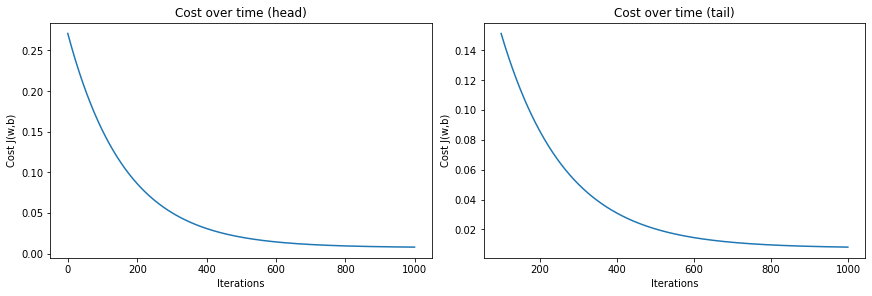

In [10]:
plot_cost(J_history)

In [15]:
friend_prediction = np.array(object=[260., 5., 5., 5., 8.5, 0.])

print(f"Your friend has a {predict(friend_prediction, w, b)} chance of being admitted to graduate school.")

Your friend has a 0.5682842624079995 chance of being admitted to graduate school.


Regression refers to predictive modeling problems that involve predicting a numeric value.

It is different from classification that involves predicting a class label. Unlike classification, you cannot use classification accuracy to evaluate the predictions made by a regression model.

Instead, you must use error metrics specifically designed for evaluating predictions made on regression problems. (Jason Brownlee, 2021)

-Citation:
    https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=We%20cannot%20calculate%20accuracy%20for,if%20you%20think%20about%20it.

In [19]:
friend_prediction = np.array(object=[320., 5., 5., 5., 1.5, 0.])
print(f"Your friend has a {predict(friend_prediction, w, b)} chance of being admitted to graduate school.")

Your friend has a 0.6987980082959432 chance of being admitted to graduate school.
